<span style="color:RED;font-weight:700;font-size:48px">
CAR PRICE PREDICTION ML
</span>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

### __DATA PREPARATION__

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [38]:
data.shape

(1000, 12)

In [ ]:
sns.pairplot(data[['v.id','on road old','on road now','years','km','rating','condition','economy','top speed','hp','torque','current price']])

In [82]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data , tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

##### SHUFFLING THE DATA

In [83]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[5.220000e+02, 6.939860e+05, 7.273740e+05, ..., 1.070000e+02,
        9.900000e+01, 3.835705e+05],
       [6.850000e+02, 6.745760e+05, 7.537750e+05, ..., 1.040000e+02,
        1.250000e+02, 2.487380e+05],
       [8.560000e+02, 5.631320e+05, 8.055850e+05, ..., 8.800000e+01,
        8.500000e+01, 1.183485e+05],
       ...,
       [1.140000e+02, 6.660940e+05, 8.719050e+05, ..., 1.190000e+02,
        1.290000e+02, 3.781325e+05],
       [7.270000e+02, 5.167220e+05, 8.655890e+05, ..., 9.100000e+01,
        8.700000e+01, 1.237195e+05],
       [5.260000e+02, 6.429560e+05, 7.371750e+05, ..., 5.700000e+01,
        7.200000e+01, 3.286980e+05]], dtype=float32)>

##### FETCHING THE NEEDED INPUT

In [84]:
x = tensor_data[:,3:-1]
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis=-1)
print(x,'\n',y)

tf.Tensor(
[[3.00000e+00 8.21910e+04 5.00000e+00 ... 1.39000e+02 1.07000e+02
  9.90000e+01]
 [5.00000e+00 1.16435e+05 2.00000e+00 ... 1.75000e+02 1.04000e+02
  1.25000e+02]
 [2.00000e+00 1.48957e+05 3.00000e+00 ... 1.39000e+02 8.80000e+01
  8.50000e+01]
 ...
 [6.00000e+00 1.04220e+05 3.00000e+00 ... 1.98000e+02 1.19000e+02
  1.29000e+02]
 [4.00000e+00 1.41800e+05 1.00000e+00 ... 1.97000e+02 9.10000e+01
  8.70000e+01]
 [6.00000e+00 8.98160e+04 1.00000e+00 ... 1.70000e+02 5.70000e+01
  7.20000e+01]], shape=(1000, 8), dtype=float32) 
 tf.Tensor(
[[383570.5]
 [248738. ]
 [118348.5]
 [501920.5]
 [160597.5]
 [195854. ]
 [408405.5]
 [422497. ]
 [386141. ]
 [370175. ]
 [242273.5]
 [463054.5]
 [232718.5]
 [496671. ]
 [428602.5]
 [237204. ]
 [291776.5]
 [465338.5]
 [381351.5]
 [493806.5]
 [413066. ]
 [339888. ]
 [451290. ]
 [250771. ]
 [486699. ]
 [371227. ]
 [315841.5]
 [441104. ]
 [329639. ]
 [296565.5]
 [ 97526. ]
 [415231.5]
 [337257. ]
 [500679.5]
 [ 98242.5]
 [328863. ]
 [322204. ]
 [41051

VALIDATION AND TESTING

In [159]:
TRAIN_RATIO = 0.8
TEST_RATIO =0.1
VAL_RATIO = 0.1
DATASET_SIZE=len(x)

In [160]:
x_train = x[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [227]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8 , reshuffle_each_iteration =True).batch(32).prefetch(tf.data.AUTOTUNE)

In [161]:
x_val = x[int(DATASET_SIZE*TRAIN_RATIO) : int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO) : int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [235]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8 , reshuffle_each_iteration =True).batch(32).prefetch(tf.data.AUTOTUNE)

In [162]:
x_test = x[int(DATASET_SIZE*(TRAIN_RATIO + TEST_RATIO)) : ]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO + TEST_RATIO)) : ]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [237]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8 , reshuffle_each_iteration =True).batch(32).prefetch(tf.data.AUTOTUNE)

##### STANDARDIZATION

In [215]:
'''
normalizer = Normalization()  # or without adapt parameters (mean = 0 , variance = 0)
x_normalized = tf.constant([[3,4,5,6,7],[1,4,5,6,7]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)
'''

normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x)


<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[-1.4828285 ,  1.6721504 , -0.00801302,  1.1932572 , -1.6202936 ,
        -1.446003  ,  0.15350276, -0.8605138 ],
       [-0.9027489 , -0.61403614,  1.4165219 , -1.6237276 , -1.1769848 ,
        -1.446003  ,  1.0779254 , -0.19519864],
       [-0.9027489 ,  1.6208904 ,  1.4165219 , -1.2716045 ,  0.15294166,
        -0.76246905, -0.72226614, -1.0981264 ],
       [ 1.4175694 , -0.54236805, -0.00801302,  0.13688788, -0.29036716,
        -1.3408439 ,  0.9806178 , -1.3832614 ],
       [ 0.83748984, -1.0935237 ,  0.70425445,  0.48901096, -0.733676  ,
         1.0252352 ,  0.05619511,  1.5156119 ],
       [ 0.25741026, -1.2573706 , -1.4325479 ,  1.5453802 , -0.733676  ,
         0.39428073, -0.52765083,  1.0403867 ],
       [ 0.25741026,  1.2454978 , -1.4325479 , -1.6237276 ,  1.0395594 ,
         1.2881328 , -0.23572785,  0.327549  ],
       [ 0.83748984, -1.415054  ,  0.70425445, -0.21523522, -1.6202936 ,
         0.23654212, -1.1601505

### __CONVOLUTIONAL NEURAL NETWORK__

In [316]:
model = tf.keras.Sequential([
    InputLayer(shape=(8,)),
    normalizer,
    Dense(128 , activation='relu' ,kernel_initializer='he_normal'),
    Dense(128 , activation='relu' ,kernel_initializer='he_normal'),
    Dense(128 , activation='relu' ,kernel_initializer='he_normal'),
    Dense(1)
])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_24                │ (None, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [165]:
import pydot
import graphviz

In [105]:
tf.keras.utils.plot_model(model , to_file='model.png',show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### __ERROR MEASUREMENT__

[ Y= mX+c ]



MEAN SQUARE ERROR (MSE) = square(Y(A)-Y(PREDICT)) [FOR HANDLING HIGH ERRORS]

MEAN ABSOLUTE ERROR (MAE) = abs(Y(A) - Y (PREDICT)) [FOR HANDLING OUTLIER]

HUBER [BALANCE BETWEEN MAE AND MSE]

### __TRAINING AND OPTIMIZATION__

In [317]:
model.compile(optimizer=Adam(learning_rate=1.2),loss = MeanAbsoluteError(),metrics=['RootMeanSquaredError'])

In [318]:
history = model.fit(train_dataset , validation_data = val_dataset ,epochs=100 , verbose =1 )

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - RootMeanSquaredError: 411493.6562 - loss: 362799.0000 - val_RootMeanSquaredError: 317010.6875 - val_loss: 289284.9062
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 306518.5000 - loss: 269202.8750 - val_RootMeanSquaredError: 123447.5547 - val_loss: 101856.9297
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 115179.4141 - loss: 94383.9375 - val_RootMeanSquaredError: 85826.5859 - val_loss: 70440.7734
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 74833.1328 - loss: 60062.3750 - val_RootMeanSquaredError: 73044.0938 - val_loss: 59240.7500
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 64929.4336 - loss: 51344.8711 - val_RootMeanSquaredError: 68186.9844 - val_loss: 55536.5312
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 63738.3398 - loss: 50712.1562 - val_RootMeanSquaredError: 68576.1797 - val_loss: 

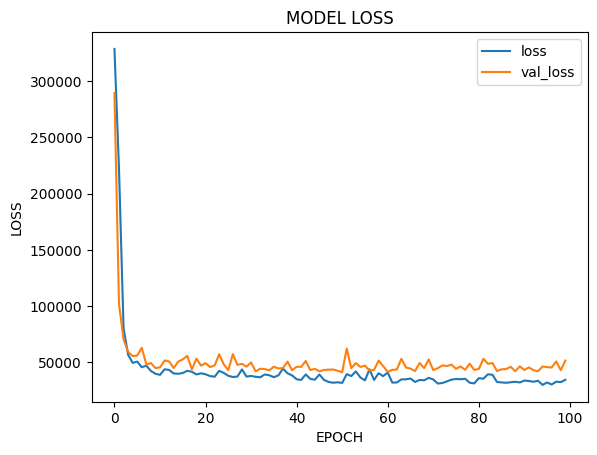

In [319]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['loss','val_loss'])
plt.show()

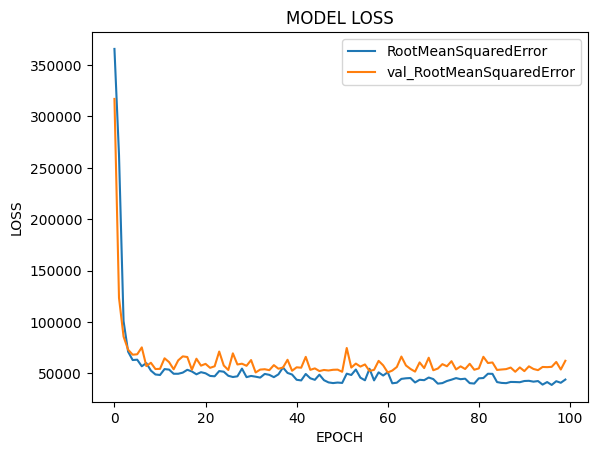

In [320]:
plt.plot(history.history['RootMeanSquaredError'])
plt.plot(history.history['val_RootMeanSquaredError'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['RootMeanSquaredError','val_RootMeanSquaredError'])
plt.show()

In [321]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - RootMeanSquaredError: 47578.0469 - loss: 36976.6484 


[38054.33984375, 48562.09375]

### __TESTING MODEL__

In [280]:
model.predict(tf.expand_dims(x_test[0],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[375495.12]], dtype=float32)

In [332]:
y_test

<tf.Tensor: shape=(100, 8), dtype=float32, numpy=
array([[6.00000e+00, 6.45470e+04, 1.00000e+00, 2.00000e+00, 1.50000e+01,
        1.72000e+02, 5.60000e+01, 9.90000e+01],
       [4.00000e+00, 5.15540e+04, 5.00000e+00, 5.00000e+00, 9.00000e+00,
        1.48000e+02, 9.60000e+01, 7.00000e+01],
       [7.00000e+00, 1.26287e+05, 2.00000e+00, 1.00000e+00, 1.30000e+01,
        1.37000e+02, 8.80000e+01, 1.17000e+02],
       [4.00000e+00, 5.07140e+04, 1.00000e+00, 1.00000e+01, 1.50000e+01,
        1.78000e+02, 8.50000e+01, 1.25000e+02],
       [3.00000e+00, 9.02520e+04, 2.00000e+00, 5.00000e+00, 1.10000e+01,
        1.97000e+02, 1.03000e+02, 8.90000e+01],
       [7.00000e+00, 9.25670e+04, 3.00000e+00, 8.00000e+00, 1.20000e+01,
        1.91000e+02, 8.30000e+01, 1.01000e+02],
       [4.00000e+00, 1.12378e+05, 3.00000e+00, 7.00000e+00, 1.20000e+01,
        1.35000e+02, 6.00000e+01, 1.14000e+02],
       [5.00000e+00, 1.26362e+05, 5.00000e+00, 7.00000e+00, 1.10000e+01,
        1.40000e+02, 6.10000e+

In [330]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(x_test)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Text(0, 0.5, 'CAR PRICE')

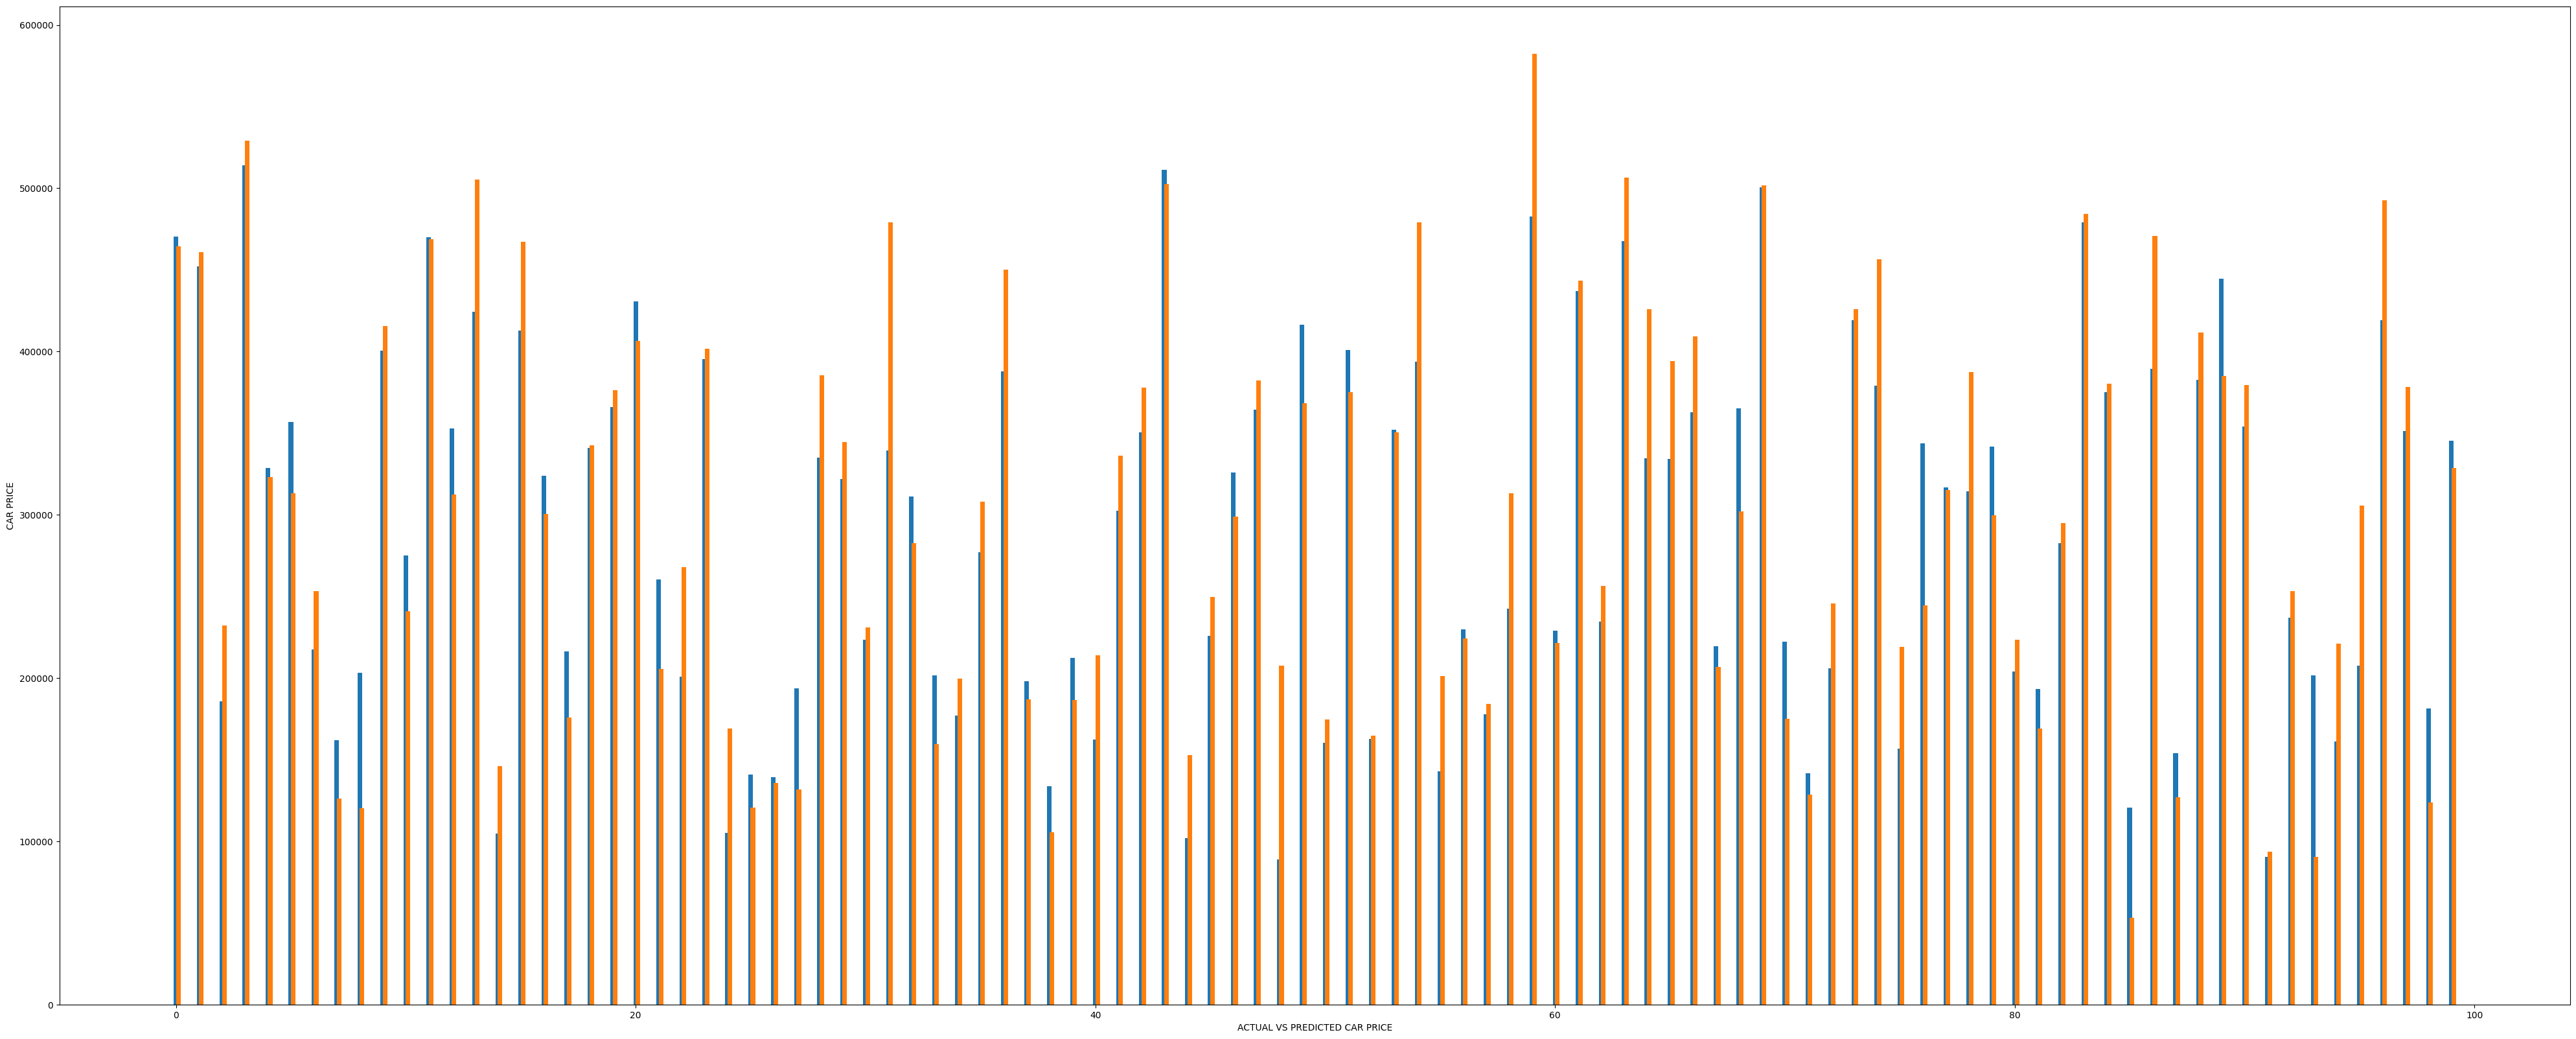

In [331]:
ind = np.arange(100)
plt.figure(figsize=(50,20))

width=0.1

plt.bar(ind , y_pred , 0.2 , label='PREDICTED CAR PRICE')
plt.bar(ind + width , y_true , 0.2 , label='ACTUAL CAR PRICE')

plt.xlabel('ACTUAL VS PREDICTED CAR PRICE')
plt.ylabel('CAR PRICE')